In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CLEANED dataset
file_path = 'D:/PROJECTS/CreditGuard/data/heloc_dataset_processed.csv'
df = pd.read_csv(file_path)

# --- Separate Features (X) and Target (y) ---
# X contains all columns EXCEPT the one we want to predict ('RiskPerformance')
X = df.drop('RiskPerformance', axis=1)

# y contains ONLY the column we want to predict
y = df['RiskPerformance']

# --- Split Data into Training and Testing Sets ---
# We'll use 80% of the data to train the model and 20% to test its performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data successfully loaded and split.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Data successfully loaded and split.
Training set shape: (8367, 23)
Testing set shape: (2092, 23)


In [2]:
# --- DIAGNOSTIC CELL ---
# Check the distribution of the target variable in the loaded dataframe
print("Distribution of 'RiskPerformance' in the loaded data:")
print(df['RiskPerformance'].value_counts())

Distribution of 'RiskPerformance' in the loaded data:
RiskPerformance
1    5459
0    5000
Name: count, dtype: int64


In [3]:
# --- Train the Logistic Regression Model ---

# Create the model instance
# max_iter=1000 ensures the model has enough iterations to find the best solution
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
log_reg_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.7132

Classification Report:
              precision    recall  f1-score   support

    Good (0)       0.69      0.73      0.71      1000
     Bad (1)       0.74      0.70      0.72      1092

    accuracy                           0.71      2092
   macro avg       0.71      0.71      0.71      2092
weighted avg       0.71      0.71      0.71      2092


Confusion Matrix:


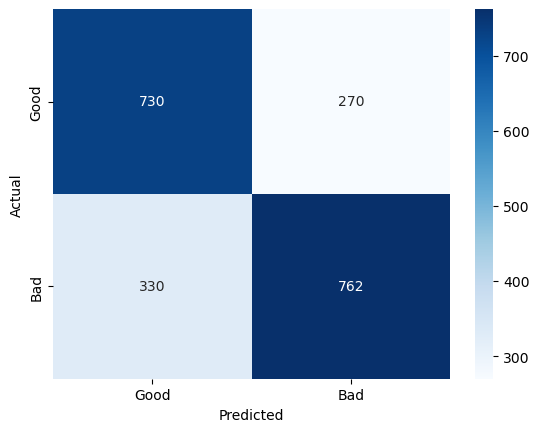

In [4]:
# --- Evaluate the Model ---

# Make predictions on the unseen test data
y_pred = log_reg_model.predict(X_test)

# --- Performance Metrics ---

# 1. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# 2. Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Good (0)', 'Bad (1)']))

# 3. Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [5]:
# --- Step 1: Train and Evaluate an SVM Model ---
from sklearn.svm import SVC

# Create the SVM model instance
# The 'rbf' kernel is great for finding complex patterns
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
print("Training the SVM model...")
svm_model.fit(X_train, y_train)
print("SVM model trained successfully!")

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the performance
print("\n--- SVM Performance ---")
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Good (0)', 'Bad (1)']))

Training the SVM model...
SVM model trained successfully!

--- SVM Performance ---
SVM Accuracy: 0.7103

Classification Report:
              precision    recall  f1-score   support

    Good (0)       0.69      0.70      0.70      1000
     Bad (1)       0.73      0.72      0.72      1092

    accuracy                           0.71      2092
   macro avg       0.71      0.71      0.71      2092
weighted avg       0.71      0.71      0.71      2092



In [6]:
# --- Step 2: Train and Evaluate a Random Forest Model ---
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model instance
# n_estimators=100 means it will build 100 decision trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
print("Training the Random Forest model...")
rf_model.fit(X_train, y_train)
print("Random Forest model trained successfully!")

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the performance
print("\n--- Random Forest Performance ---")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Good (0)', 'Bad (1)']))

Training the Random Forest model...
Random Forest model trained successfully!

--- Random Forest Performance ---
Random Forest Accuracy: 0.7165

Classification Report:
              precision    recall  f1-score   support

    Good (0)       0.72      0.66      0.69      1000
     Bad (1)       0.71      0.77      0.74      1092

    accuracy                           0.72      2092
   macro avg       0.72      0.71      0.71      2092
weighted avg       0.72      0.72      0.72      2092

